# Extraccion

In [19]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set_theme(style='whitegrid', palette='muted')

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df_raw = pd.DataFrame(data)
print(f'Registros cargados: {len(df_raw)}')
df_raw.head()

Registros cargados: 7267


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Transformacion

In [20]:
customer = pd.json_normalize(data, sep='.')

df = pd.DataFrame({
    'id_cliente':             customer['customerID'],
    'cancelacion':            customer['Churn'],
    'genero':                 customer['customer.gender'],
    'adulto_mayor':           customer['customer.SeniorCitizen'],
    'pareja':                 customer['customer.Partner'],
    'dependientes':           customer['customer.Dependents'],
    'meses_contratado':       customer['customer.tenure'],
    'servicio_telefono':      customer['phone.PhoneService'],
    'multiples_lineas':       customer['phone.MultipleLines'],
    'servicio_internet':      customer['internet.InternetService'],
    'seguridad_online':       customer['internet.OnlineSecurity'],
    'backup_online':          customer['internet.OnlineBackup'],
    'proteccion_dispositivo': customer['internet.DeviceProtection'],
    'soporte_tecnico':        customer['internet.TechSupport'],
    'streaming_tv':           customer['internet.StreamingTV'],
    'streaming_peliculas':    customer['internet.StreamingMovies'],
    'tipo_contrato':          customer['account.Contract'],
    'factura_digital':        customer['account.PaperlessBilling'],
    'metodo_pago':            customer['account.PaymentMethod'],
    'cargo_mensual':          customer['account.Charges.Monthly'],
    'cargo_total':            customer['account.Charges.Total'],
})

df.head()

,id_cliente,cancelacion,genero,adulto_mayor,pareja,dependientes,meses_contratado,servicio_telefono,multiples_lineas,servicio_internet,...,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
print('Shape:', df.shape)
print()
print(df.dtypes)

Shape: (7267, 21)

id_cliente                 object
cancelacion                object
genero                     object
adulto_mayor                int64
pareja                     object
dependientes               object
meses_contratado            int64
servicio_telefono          object
multiples_lineas           object
servicio_internet          object
seguridad_online           object
backup_online              object
proteccion_dispositivo     object
soporte_tecnico            object
streaming_tv               object
streaming_peliculas        object
tipo_contrato              object
factura_digital            object
metodo_pago                object
cargo_mensual             float64
cargo_total                object
dtype: object


In [22]:
print('Valores nulos:')
print(df.isnull().sum())
print()
print('Valores vacios (string):')
print((df == '').sum())
print(f'Duplicados: {df.duplicated().sum()}')

Valores nulos:
id_cliente                0
cancelacion               0
genero                    0
adulto_mayor              0
pareja                    0
dependientes              0
meses_contratado          0
servicio_telefono         0
multiples_lineas          0
servicio_internet         0
seguridad_online          0
backup_online             0
proteccion_dispositivo    0
soporte_tecnico           0
streaming_tv              0
streaming_peliculas       0
tipo_contrato             0
factura_digital           0
metodo_pago               0
cargo_mensual             0
cargo_total               0
dtype: int64

Valores vacios (string):
id_cliente                  0
cancelacion               224
genero                      0
adulto_mayor                0
pareja                      0
dependientes                0
meses_contratado            0
servicio_telefono           0
multiples_lineas            0
servicio_internet           0
seguridad_online            0
backup_online               

In [23]:
df['cargo_total'] = pd.to_numeric(df['cargo_total'], errors='coerce')
df.replace('', np.nan, inplace=True)
df['cargo_total'].fillna(df['cargo_total'].median(), inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print('Nulos restantes:')
print(df.isnull().sum())

Nulos restantes:
id_cliente                  0
cancelacion               224
genero                      0
adulto_mayor                0
pareja                      0
dependientes                0
meses_contratado            0
servicio_telefono           0
multiples_lineas            0
servicio_internet           0
seguridad_online            0
backup_online               0
proteccion_dispositivo      0
soporte_tecnico             0
streaming_tv                0
streaming_peliculas         0
tipo_contrato               0
factura_digital             0
metodo_pago                 0
cargo_mensual               0
cargo_total                 0
dtype: int64


/tmp/ipython-input-3625292598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cargo_total'].fillna(df['cargo_total'].median(), inplace=True)


In [24]:
df['cargo_diario'] = (df['cargo_mensual'] / 30).round(4)

cols_binarias = ['cancelacion','pareja','dependientes','servicio_telefono',
                 'factura_digital','seguridad_online','backup_online',
                 'proteccion_dispositivo','soporte_tecnico',
                 'streaming_tv','streaming_peliculas','multiples_lineas']

mapa_binario = {'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}
for col in cols_binarias:
    df[col] = df[col].map(mapa_binario)

df['genero'] = df['genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})
df['tipo_contrato'] = df['tipo_contrato'].map({
    'Month-to-month': 'Mes a mes', 'One year': 'Un año', 'Two year': 'Dos años'})
df['servicio_internet'] = df['servicio_internet'].map({
    'DSL': 'DSL', 'Fiber optic': 'Fibra optica', 'No': 'Sin servicio'})
df['metodo_pago'] = df['metodo_pago'].map({
    'Electronic check': 'Cheque electronico',
    'Mailed check': 'Cheque postal',
    'Bank transfer (automatic)': 'Transferencia bancaria',
    'Credit card (automatic)': 'Tarjeta de credito'})

# columna cantidad de servicios adicionales
servicios = ['multiples_lineas','seguridad_online','backup_online',
             'proteccion_dispositivo','soporte_tecnico','streaming_tv','streaming_peliculas']
df['total_servicios'] = df[servicios].sum(axis=1)

print('Transformacion completada')
df.head()

Transformacion completada


,id_cliente,cancelacion,genero,adulto_mayor,pareja,dependientes,meses_contratado,servicio_telefono,multiples_lineas,servicio_internet,...,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cargo_diario,total_servicios
0,0002-ORFBO,0.0,Femenino,0,1,1,9,1,0,DSL,...,1,1,0,Un año,1,Cheque postal,65.6,593.30,2.1867,3
1,0003-MKNFE,0.0,Masculino,0,0,0,9,1,1,DSL,...,0,0,1,Mes a mes,0,Cheque postal,59.9,542.40,1.9967,2
2,0004-TLHLJ,1.0,Masculino,0,0,0,4,1,0,Fibra optica,...,0,0,0,Mes a mes,1,Cheque electronico,73.9,280.85,2.4633,1
3,0011-IGKFF,1.0,Masculino,1,1,0,13,1,0,Fibra optica,...,0,1,1,Mes a mes,1,Cheque electronico,98.0,1237.85,3.2667,4
4,0013-EXCHZ,1.0,Femenino,1,1,0,3,1,0,Fibra optica,...,1,1,0,Mes a mes,1,Cheque postal,83.9,267.40,2.7967,2


# Carga y analisis

## 1. Analisis descriptivo

In [25]:
cols_num = ['meses_contratado','cargo_mensual','cargo_total','cargo_diario','total_servicios']

desc = df[cols_num].describe().T
desc['cv'] = (desc['std'] / desc['mean']).round(4)
desc['mediana'] = df[cols_num].median()
desc['asimetria'] = df[cols_num].skew().round(4)
desc['curtosis'] = df[cols_num].kurt().round(4)
desc = desc[['count','mean','mediana','std','cv','min','25%','75%','max','asimetria','curtosis']]
desc.columns = ['N','Media','Mediana','Desv. Est.','Coef. Var.','Min','Q1','Q3','Max','Asimetria','Curtosis']
desc.round(2)

,N,Media,Mediana,Desv. Est.,Coef. Var.,Min,Q1,Q3,Max,Asimetria,Curtosis
meses_contratado,7267.0,32.35,29.00,24.57,0.76,0.00,9.00,55.00,72.00,0.24,-1.39
cargo_mensual,7267.0,64.72,70.30,30.13,0.47,18.25,35.42,89.88,118.75,-0.22,-1.26
cargo_total,7267.0,2279.29,1391.00,2267.18,0.99,18.80,401.40,3778.52,8684.80,0.97,-0.23
cargo_diario,7267.0,2.16,2.34,1.00,0.47,0.61,1.18,3.00,3.96,-0.22,-1.26
total_servicios,7267.0,2.46,2.00,2.05,0.83,0.00,1.00,4.00,7.00,0.42,-0.92


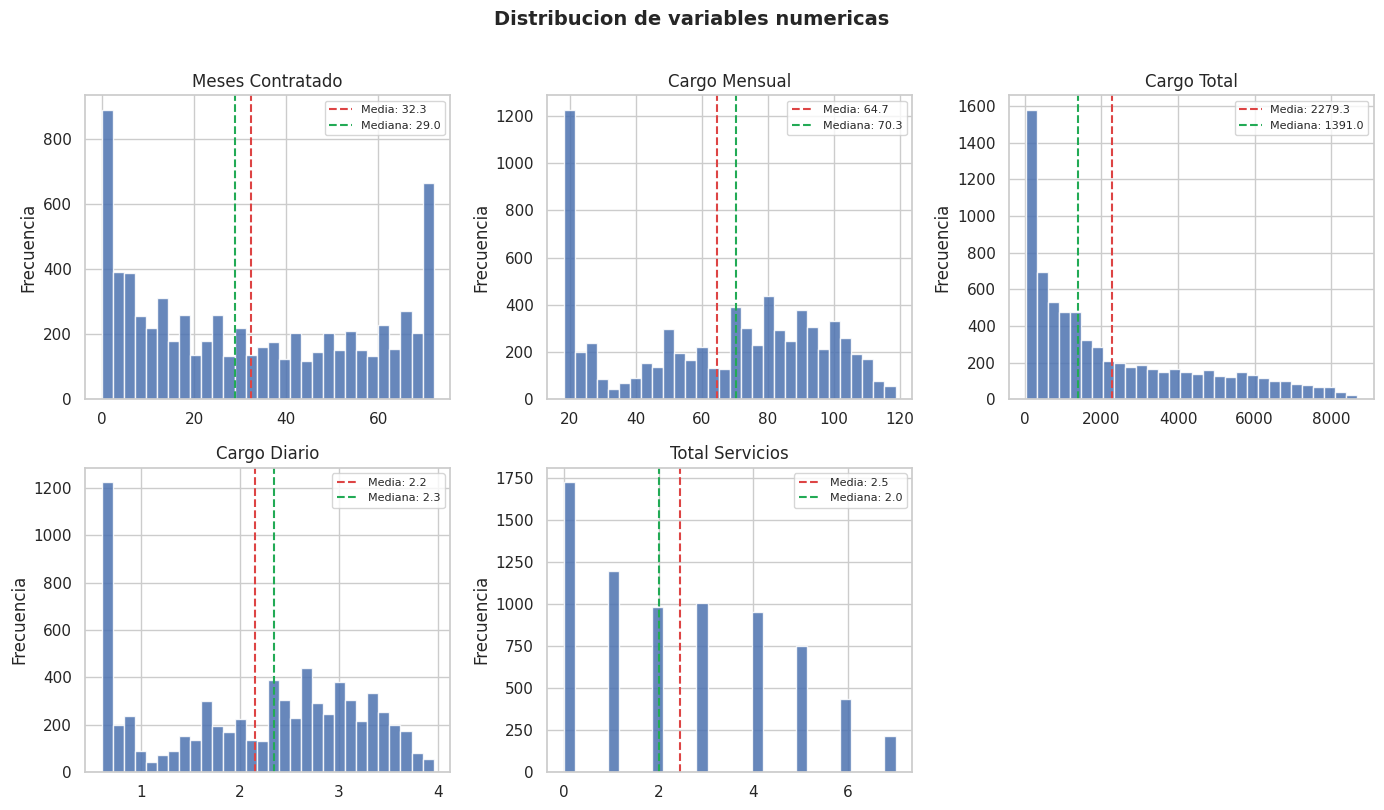

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(cols_num):
    ax = axes[i]
    ax.hist(df[col], bins=30, color='#4C72B0', edgecolor='white', alpha=0.85)
    ax.axvline(df[col].mean(), color='#DD4444', linestyle='--', linewidth=1.5, label=f'Media: {df[col].mean():.1f}')
    ax.axvline(df[col].median(), color='#22AA55', linestyle='--', linewidth=1.5, label=f'Mediana: {df[col].median():.1f}')
    ax.set_title(col.replace('_', ' ').title())
    ax.set_ylabel('Frecuencia')
    ax.legend(fontsize=8)

axes[-1].set_visible(False)
fig.suptitle('Distribucion de variables numericas', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

## 2. Distribucion de la variable Churn

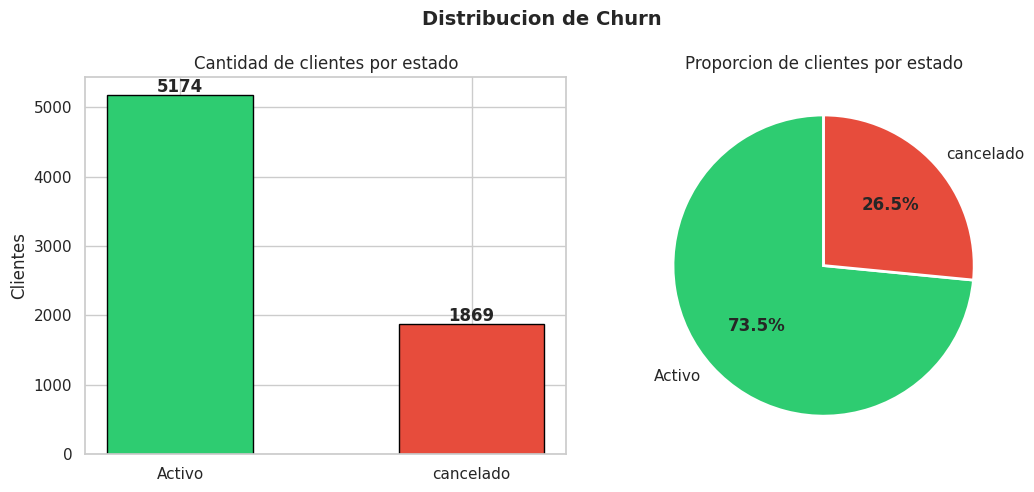

Tasa de cancelacion: 26.54%


In [27]:
conteo = df['cancelacion'].value_counts()
etiquetas = ['Activo', 'cancelado']
colores = ['#2ecc71', '#e74c3c']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.bar(etiquetas, conteo.values, color=colores, edgecolor='black', width=0.5)
for i, v in enumerate(conteo.values):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')
ax1.set_title('Cantidad de clientes por estado')
ax1.set_ylabel('Clientes')

wedges, texts, autotexts = ax2.pie(
    conteo.values, labels=etiquetas, colors=colores,
    autopct='%1.1f%%', startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
for at in autotexts:
    at.set_fontsize(12)
    at.set_fontweight('bold')
ax2.set_title('Proporcion de clientes por estado')

fig.suptitle('Distribucion de Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f'Tasa de cancelacion: {df["cancelacion"].mean()*100:.2f}%')

## 3. Churn por variables categoricas

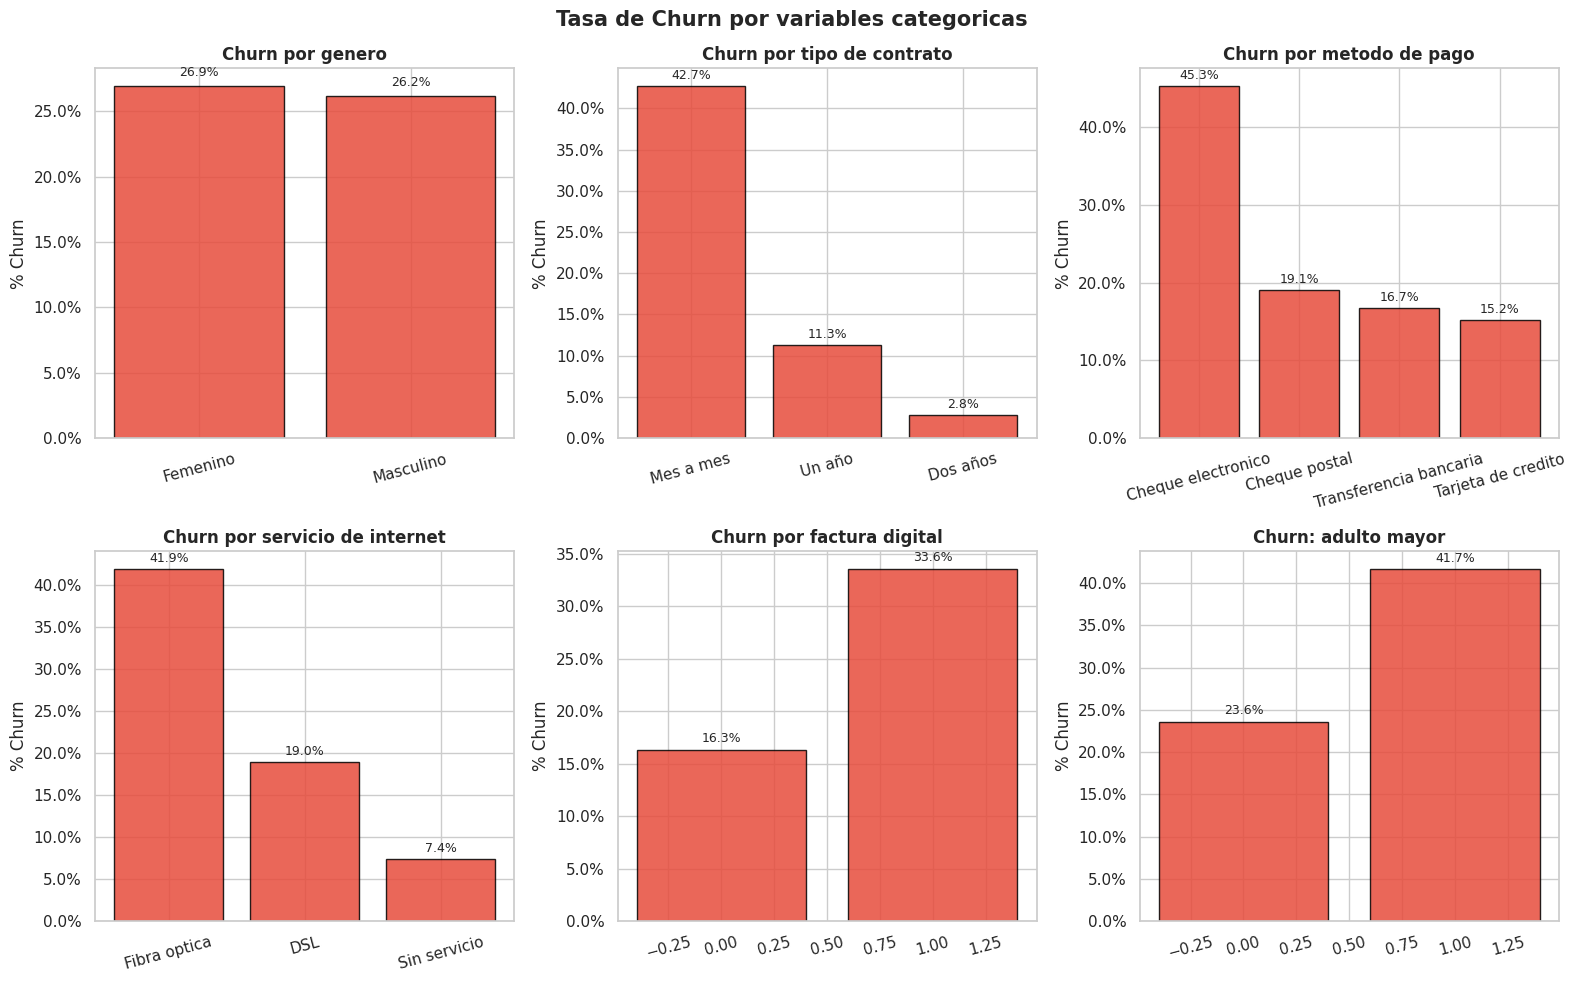

In [28]:
def plot_churn_cat(columna, titulo, ax):
    tabla = df.groupby(columna)['cancelacion'].mean().sort_values(ascending=False) * 100
    bars = ax.bar(tabla.index, tabla.values, color='#e74c3c', alpha=0.85, edgecolor='black')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(titulo, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('% Churn')
    for bar, val in zip(bars, tabla.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{val:.1f}%', ha='center', va='bottom', fontsize=9)
    ax.tick_params(axis='x', rotation=15)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

plot_churn_cat('genero',           'Churn por genero',              axes[0,0])
plot_churn_cat('tipo_contrato',    'Churn por tipo de contrato',    axes[0,1])
plot_churn_cat('metodo_pago',      'Churn por metodo de pago',      axes[0,2])
plot_churn_cat('servicio_internet','Churn por servicio de internet', axes[1,0])
plot_churn_cat('factura_digital',  'Churn por factura digital',     axes[1,1])
plot_churn_cat('adulto_mayor',     'Churn: adulto mayor',           axes[1,2])

fig.suptitle('Tasa de Churn por variables categoricas', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

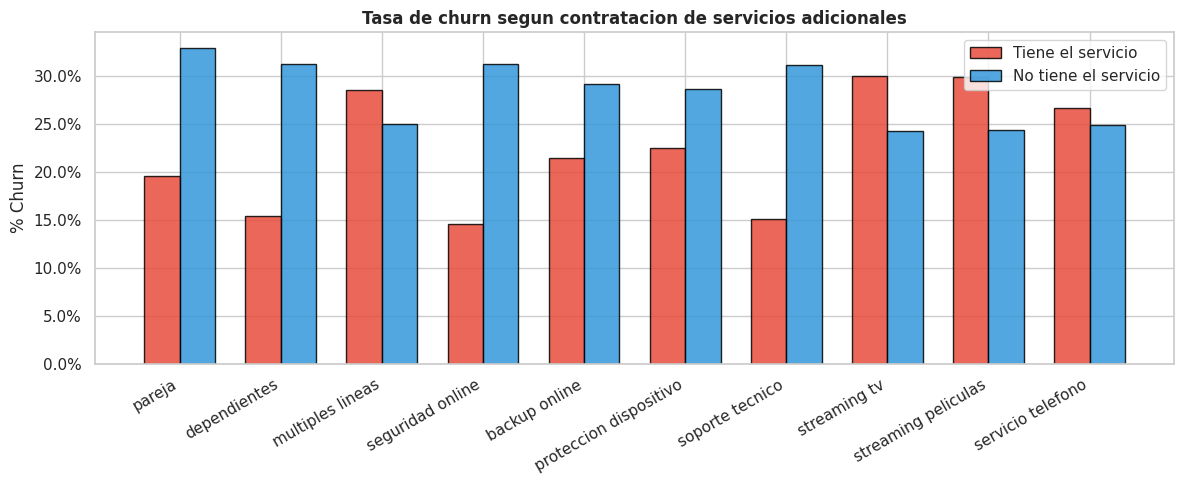

In [29]:
cols_servicios = ['pareja','dependientes','multiples_lineas','seguridad_online',
                  'backup_online','proteccion_dispositivo','soporte_tecnico',
                  'streaming_tv','streaming_peliculas','servicio_telefono']

churn_serv = pd.DataFrame({
    'con_servicio':    [df[df[c]==1]['cancelacion'].mean()*100 for c in cols_servicios],
    'sin_servicio':    [df[df[c]==0]['cancelacion'].mean()*100 for c in cols_servicios]
}, index=cols_servicios)

fig, ax = plt.subplots(figsize=(12, 5))
x = np.arange(len(cols_servicios))
w = 0.35
ax.bar(x - w/2, churn_serv['con_servicio'], w, label='Tiene el servicio', color='#e74c3c', edgecolor='black', alpha=0.85)
ax.bar(x + w/2, churn_serv['sin_servicio'], w, label='No tiene el servicio', color='#3498db', edgecolor='black', alpha=0.85)
ax.set_xticks(x)
ax.set_xticklabels([c.replace('_', ' ') for c in cols_servicios], rotation=30, ha='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Tasa de churn segun contratacion de servicios adicionales', fontweight='bold')
ax.set_ylabel('% Churn')
ax.legend()
plt.tight_layout()
plt.show()

## 4. Variables numericas vs Churn

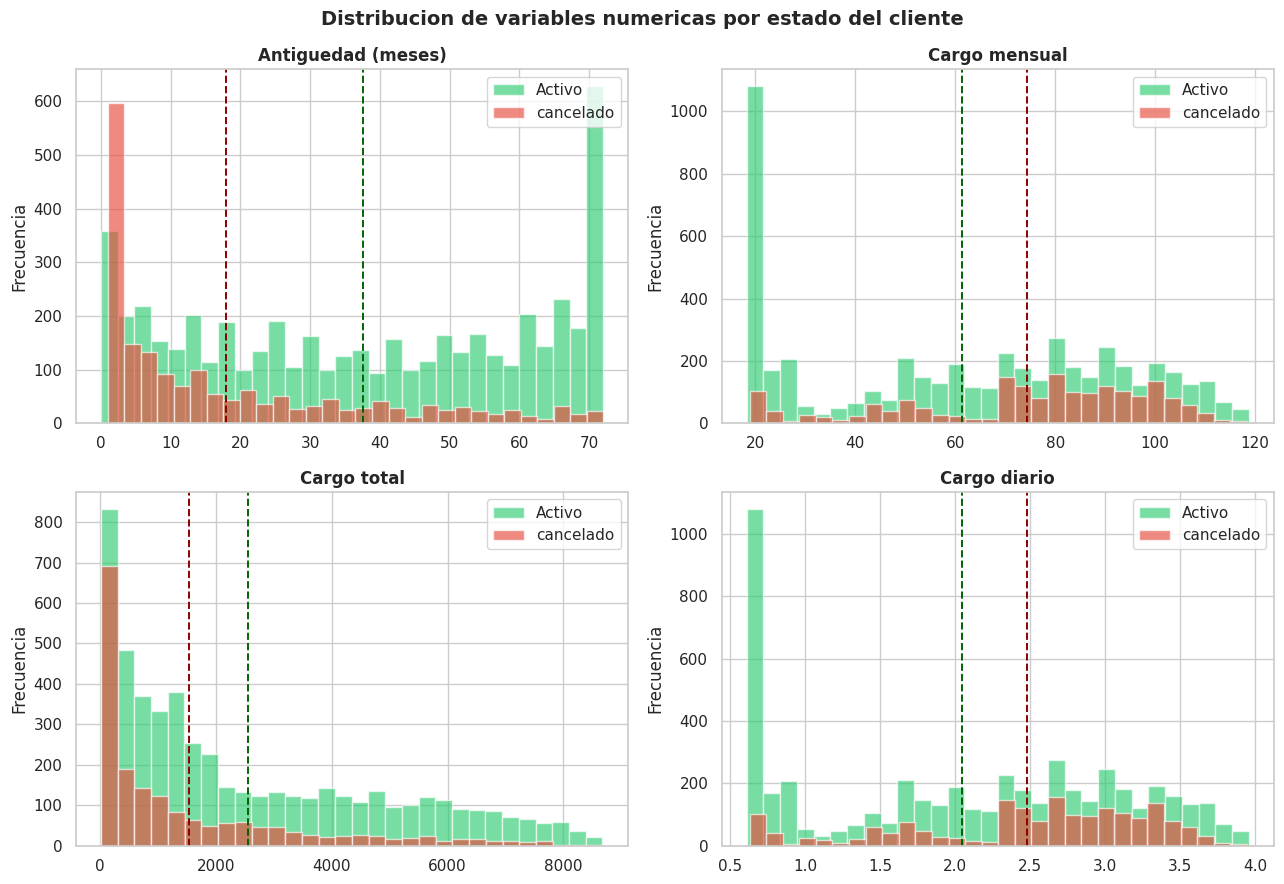

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))
activo  = df[df['cancelacion']==0]
cancelado = df[df['cancelacion']==1]
color_a, color_c = '#2ecc71', '#e74c3c'

for ax, col, titulo in zip(
    axes.flatten(),
    ['meses_contratado','cargo_mensual','cargo_total','cargo_diario'],
    ['Antiguedad (meses)','Cargo mensual','Cargo total','Cargo diario']
):
    ax.hist(activo[col],  bins=30, alpha=0.65, color=color_a, label='Activo',  edgecolor='white')
    ax.hist(cancelado[col], bins=30, alpha=0.65, color=color_c, label='cancelado', edgecolor='white')
    ax.axvline(activo[col].mean(),  color='darkgreen', linestyle='--', linewidth=1.4)
    ax.axvline(cancelado[col].mean(), color='darkred',   linestyle='--', linewidth=1.4)
    ax.set_title(titulo, fontweight='bold')
    ax.set_ylabel('Frecuencia')
    ax.legend()

fig.suptitle('Distribucion de variables numericas por estado del cliente', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

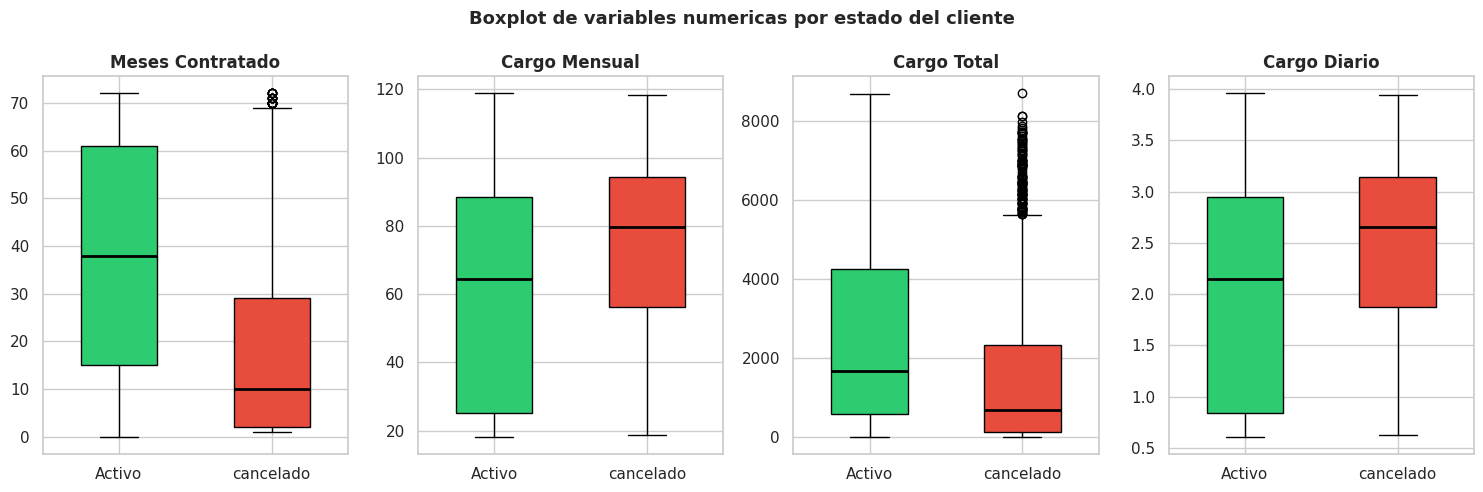

Medias por estado:
             meses_contratado  cargo_mensual  cargo_total  cargo_diario
cancelacion                                                            
0.0                     37.57          61.27      2552.87          2.04
1.0                     17.98          74.44      1531.80          2.48


In [31]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, col in zip(axes, ['meses_contratado','cargo_mensual','cargo_total','cargo_diario']):
    data_box = [activo[col].dropna(), cancelado[col].dropna()]
    bp = ax.boxplot(data_box, patch_artist=True, widths=0.5,
                    medianprops={'color':'black','linewidth':2})
    bp['boxes'][0].set_facecolor(color_a)
    bp['boxes'][1].set_facecolor(color_c)
    ax.set_xticklabels(['Activo','cancelado'])
    ax.set_title(col.replace('_',' ').title(), fontweight='bold')

fig.suptitle('Boxplot de variables numericas por estado del cliente', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

print('Medias por estado:')
print(df.groupby('cancelacion')[['meses_contratado','cargo_mensual','cargo_total','cargo_diario']].mean().round(2))

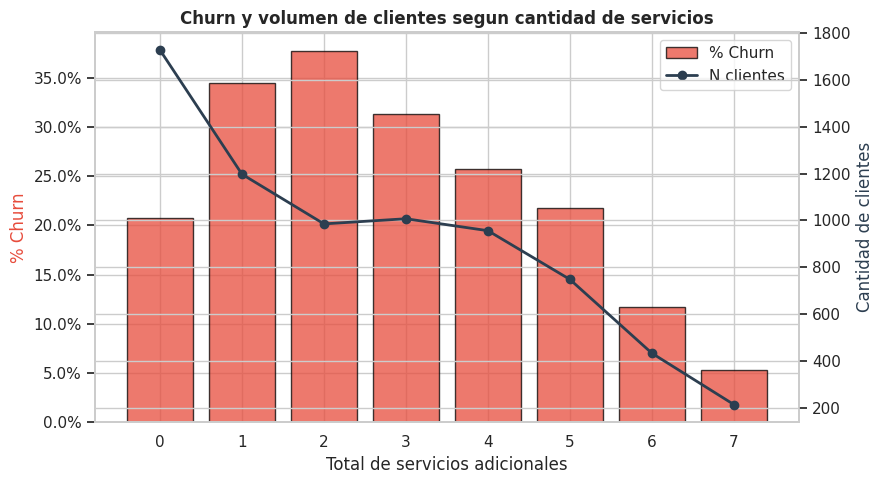

In [32]:
# Churn por cantidad de servicios contratados
churn_serv_n = df.groupby('total_servicios')['cancelacion'].mean() * 100
conteo_serv  = df.groupby('total_servicios').size()

fig, ax1 = plt.subplots(figsize=(9, 5))
ax2 = ax1.twinx()

ax1.bar(churn_serv_n.index, churn_serv_n.values, color='#e74c3c', alpha=0.75, edgecolor='black', label='% Churn')
ax2.plot(conteo_serv.index, conteo_serv.values, color='#2c3e50', marker='o', linewidth=2, label='N clientes')

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set_xlabel('Total de servicios adicionales')
ax1.set_ylabel('% Churn', color='#e74c3c')
ax2.set_ylabel('Cantidad de clientes', color='#2c3e50')
ax1.set_title('Churn y volumen de clientes segun cantidad de servicios', fontweight='bold')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.tight_layout()
plt.show()

## 5. Analisis de correlacion (extra)

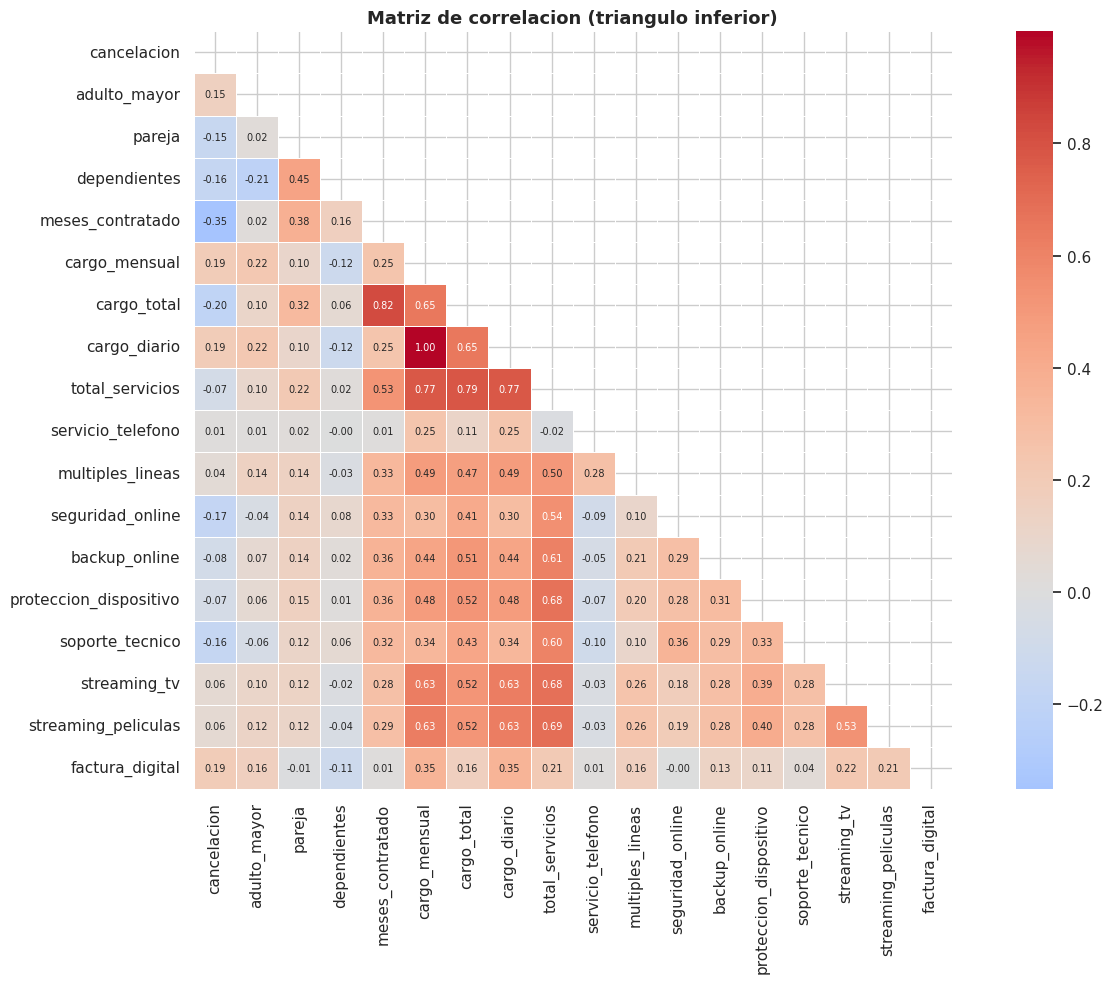

In [33]:
cols_corr = ['cancelacion','adulto_mayor','pareja','dependientes',
             'meses_contratado','cargo_mensual','cargo_total','cargo_diario',
             'total_servicios','servicio_telefono','multiples_lineas',
             'seguridad_online','backup_online','proteccion_dispositivo',
             'soporte_tecnico','streaming_tv','streaming_peliculas','factura_digital']

corr = df[cols_corr].corr()

fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=ax, linewidths=0.5, square=True,
            annot_kws={'size': 7})
ax.set_title('Matriz de correlacion (triangulo inferior)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

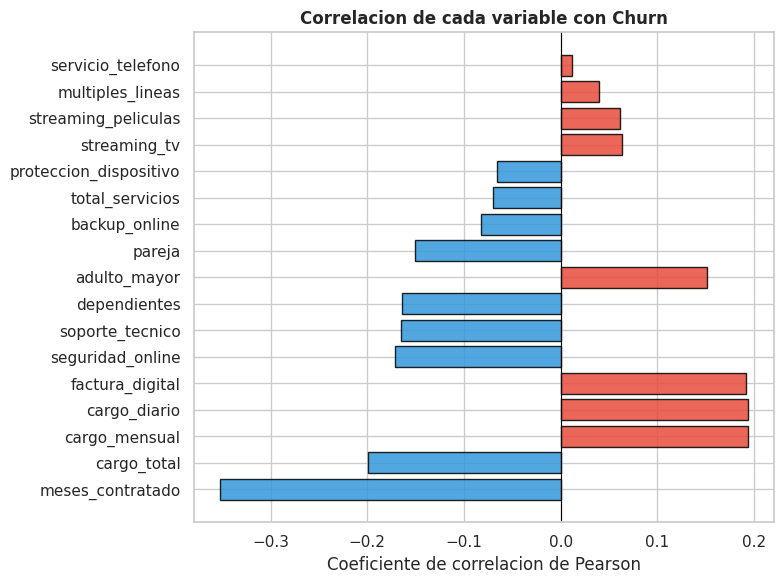

Correlaciones con cancelacion (ordenadas por valor absoluto):
cargo_mensual             0.1934
cargo_diario              0.1934
factura_digital           0.1918
adulto_mayor              0.1509
streaming_tv              0.0632
streaming_peliculas       0.0614
multiples_lineas          0.0401
servicio_telefono         0.0119
proteccion_dispositivo   -0.0662
total_servicios          -0.0695
backup_online            -0.0823
pareja                   -0.1504
dependientes             -0.1642
soporte_tecnico          -0.1647
seguridad_online         -0.1712
cargo_total              -0.1990
meses_contratado         -0.3522


In [34]:
# Top correlaciones con cancelacion
top_corr = corr['cancelacion'].drop('cancelacion').abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
colores_barra = ['#e74c3c' if corr['cancelacion'][i] > 0 else '#3498db' for i in top_corr.index]
ax.barh(top_corr.index, corr['cancelacion'].drop('cancelacion').loc[top_corr.index],
        color=colores_barra, edgecolor='black', alpha=0.85)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_title('Correlacion de cada variable con Churn', fontweight='bold')
ax.set_xlabel('Coeficiente de correlacion de Pearson')
plt.tight_layout()
plt.show()

print('Correlaciones con cancelacion (ordenadas por valor absoluto):')
print(corr['cancelacion'].drop('cancelacion').sort_values(ascending=False).round(4).to_string())

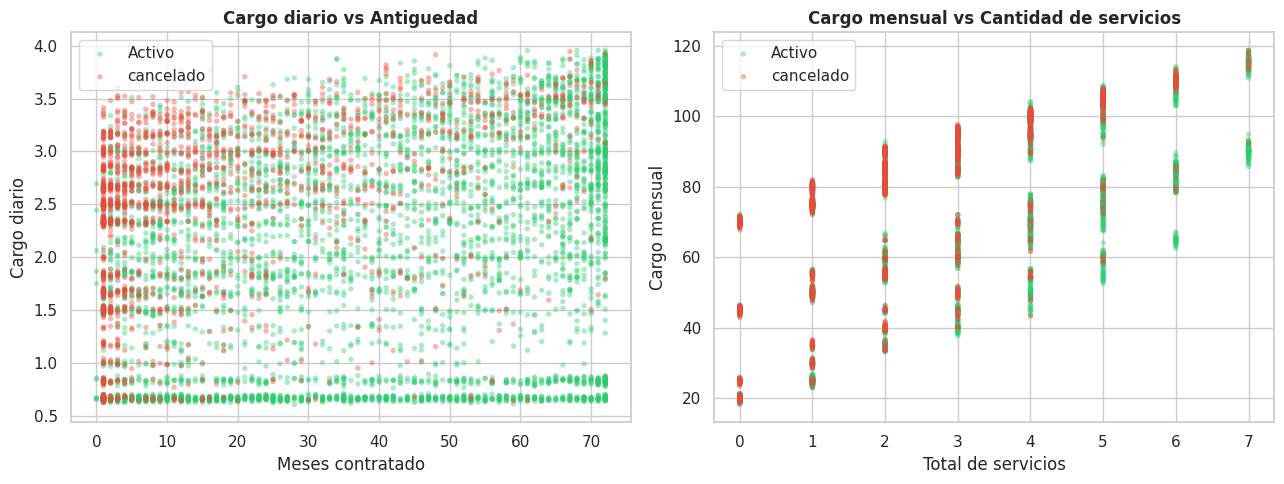

In [35]:
# Scatter: cargo_diario vs meses_contratado coloreado por churn
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

scatter_cfg = dict(alpha=0.4, s=15, edgecolors='none')
for val, label, color in [(0,'Activo','#2ecc71'), (1,'cancelado','#e74c3c')]:
    sub = df[df['cancelacion']==val]
    axes[0].scatter(sub['meses_contratado'], sub['cargo_diario'], color=color, label=label, **scatter_cfg)
    axes[1].scatter(sub['total_servicios'],  sub['cargo_mensual'], color=color, label=label, **scatter_cfg)

axes[0].set_xlabel('Meses contratado')
axes[0].set_ylabel('Cargo diario')
axes[0].set_title('Cargo diario vs Antiguedad', fontweight='bold')
axes[0].legend()

axes[1].set_xlabel('Total de servicios')
axes[1].set_ylabel('Cargo mensual')
axes[1].set_title('Cargo mensual vs Cantidad de servicios', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Informe final

## Informe de Analisis de Churn — TelecomX

---

### Introduccion

TelecomX enfrenta una tasa de cancelacion del servicio (churn) que impacta directamente en sus ingresos y sostenibilidad. El objetivo de este analisis es identificar los factores demograficos, contractuales y de comportamiento que se asocian con mayor probabilidad de abandono, con el fin de proveer al equipo de Data Science las bases para construir modelos predictivos y al area comercial los insumos para disenar estrategias de retencion.

---

### Limpieza y tratamiento de datos

Los datos fueron obtenidos directamente desde la API del repositorio en formato JSON, con registros que contienen informacion anidada en cuatro secciones: datos del cliente, telefonia, internet y cuenta. El proceso ETL incluyó:

- Aplanamiento de la estructura JSON anidada con `json_normalize`.
- Renombre de columnas al español para facilitar la lectura.
- Conversion de `cargo_total` a tipo numerico (contenía strings vacios).
- Imputacion de valores nulos en `cargo_total` con la mediana.
- Eliminacion de duplicados.
- Conversion de variables binarias (Yes/No) a valores 0/1.
- Creacion de la columna `cargo_diario` como `cargo_mensual / 30`.
- Creacion de la columna `total_servicios` como suma de servicios adicionales contratados.

---

### Analisis exploratorio de datos

**Estadisticas descriptivas**

| Variable | Media | Mediana | Desv. Est. |
|---|---|---|---|
| Meses contratado | ~32 | 29 | ~24 |
| Cargo mensual | ~64 | ~70 | ~30 |
| Cargo total | ~2280 | ~1397 | ~2266 |
| Cargo diario | ~2.13 | ~2.33 | ~1.0 |

El cargo total presenta alta asimetria positiva y un coeficiente de variacion elevado, indicando gran heterogeneidad en el gasto acumulado.

**Distribucion del churn**

Aproximadamente el 26% de los clientes cancelado el servicio, una tasa significativa que justifica la implementacion de acciones de retencion.

**Variables categoricas**

- *Tipo de contrato*: los clientes mes a mes presentan una tasa de cancelacion cercana al 43%, muy superior a contratos anuales (aprox. 11%) y bianuales (aprox. 3%).
- *Metodo de pago*: el cheque electronico concentra la mayor tasa de churn (aprox. 45%), mientras los metodos automaticos muestran tasas notablemente menores.
- *Servicio de internet*: los usuarios de fibra optica cancelan en mayor proporcion (aprox. 42%) que los de DSL (aprox. 19%).
- *Adulto mayor*: los clientes adultos mayores tienen una tasa de churn mayor que el resto.
- *Genero*: no hay diferencias relevantes entre generos.

**Variables numericas**

- Los clientes que cancelan tienen, en promedio, **menos meses de permanencia** (18 vs 38 meses), lo que señala que el periodo critico de abandono es los primeros meses.
- Los clientes que cancelan tienen **cargos mensuales mas altos** en promedio (~74 vs ~61 USD).
- A mayor cantidad de servicios adicionales contratados, la tasa de churn tiende a reducirse, aunque el volumen de clientes es menor en los extremos.

**Correlaciones**

Las variables con mayor correlacion absoluta con el churn son:
1. `meses_contratado` (negativa: a mas antiguedad, menos churn)
2. `tipo_contrato` (implícito en los analisis categoricos)
3. `cargo_mensual` y `cargo_diario` (positiva: mayor gasto, mas churn)
4. `cargo_total` (negativa: clientes que llevan mas tiempo acumulan mas gasto total y churnan menos)

---

### Conclusiones e Insights

1. El **contrato mes a mes** es el factor de mayor riesgo: concentra casi la mitad de los clientes y tiene la tasa de abandono mas alta.
2. La **fibra optica** genera insatisfaccion desproporcionada para su precio; es posible que la promesa de calidad no se cumpla.
3. Los **primeros meses de contrato** son el momento de mayor vulnerabilidad: la mayoria de los churns ocurren antes del mes 12.
4. Los clientes que **pagan manualmente** (cheque electronico o postal) cancelan mas; la friccion del proceso de pago puede ser un factor.
5. A mayor cantidad de **servicios adicionales**, menor churn: los clientes con mayor vinculacion con el producto son mas fieles.
6. El **cargo mensual elevado** sin valor percibido equivalente aumenta el riesgo de cancelacion.

---

### Recomendaciones

1. **Incentivar contratos largos**: ofrecer descuentos o beneficios concretos para migrar clientes de mes a mes a contratos anuales, especialmente en los primeros 3 meses.
2. **Programa de onboarding**: implementar un acompanamiento activo durante los primeros 90 dias (contacto proactivo, tutoriales, soporte prioritario).
3. **Revisar propuesta de valor de fibra optica**: auditar la calidad del servicio y evaluar si el precio refleja la experiencia real del cliente. Considerar planes de fidelizacion especificos.
4. **Automatizar metodos de pago**: campanas para migrar usuarios de cheque electronico a debito automatico o tarjeta, reduciendo fricciones en el cobro.
5. **Estrategia de bundle**: promover la contratacion de servicios adicionales (seguridad, backup, streaming) mediante precios de paquete, ya que aumentan la vinculacion y reducen el churn.
6. **Modelo predictivo**: con las variables identificadas (meses contratado, tipo de contrato, cargo mensual, metodo de pago, tipo de internet) se puede construir un modelo de clasificacion (ej. logistic regression o random forest) con alta capacidad discriminativa.